In [1]:
import numpy as np 
import csv
import pandas as pd
import matplotlib.pyplot as plt
from math import pi, exp, sqrt
%matplotlib inline

------------------------------------

# Data Preprocessing

In [2]:
input_path = "tsv/Example.tsv"
input_ds = pd.read_csv(input_path, header = None, sep="\t")

In [3]:
input_ds.head()

,0,1,2,3
0,A,-1.525735,1.674080,NaN
1,A,6.069158,5.152899,NaN
2,A,-4.146633,1.081567,NaN
3,A,-4.994697,2.974933,NaN
4,A,-0.837513,-1.655131,NaN


In [4]:
n_cols_0 = len(input_ds.columns)
if n_cols_0>3:
    input_ds = input_ds.drop(n_cols_0-1, axis=1) #delete the last column because its NaN for all rows

In [5]:
input_ds.head()

,0,1,2
0,A,-1.525735,1.674080
1,A,6.069158,5.152899
2,A,-4.146633,1.081567
3,A,-4.994697,2.974933
4,A,-0.837513,-1.655131


In [6]:
n_cols = len(input_ds.columns)
print("Number of columns:", n_cols)

Number of columns: 3


In [7]:
#initiate empty list for column name
col_name = []

#naming scheme starts with x1 because we will concatenate
#x0 = 1 vector in the list later 
for i in range(n_cols):
    #last column is the target value
    if (i == 0):
        col_name.append('labels')
    else:
        col_name.append('x_{}'.format(i-1))
        
print(col_name)

['labels', 'x_0', 'x_1']


In [8]:
#assigning column names to data set
input_ds.columns = col_name
print (input_ds.head())

  labels       x_0       x_1
0      A -1.525735  1.674080
1      A  6.069158  5.152899
2      A -4.146633  1.081567
3      A -4.994697  2.974933
4      A -0.837513 -1.655131


In [9]:
#calculate labels
vals, counts = np.unique(input_ds['labels'], return_counts= True)
print(vals)
print(counts)

['A' 'B']
[200 200]


In [10]:
#set up class
c = np.squeeze(np.asarray(input_ds['labels']))
#print first 5 rows
print(c[:5])

['A' 'A' 'A' 'A' 'A']


In [11]:
#set up attributes
x = input_ds.iloc[:,1:n_cols]
x = np.squeeze(np.asarray(x))
#print first 5 rows
print(x[:5,:])
print("Shape of x:",x.shape)

[[-1.525735  1.67408 ]
 [ 6.069158  5.152899]
 [-4.146633  1.081567]
 [-4.994697  2.974933]
 [-0.837513 -1.655131]]
Shape of x: (400, 2)


-----------------------------------

# Helper Function

In [12]:
def retrieve_class_index(class_col, vals):
    '''
    Retrieve the class index w.r.t the class row
    
    @param class_col: The column or array where the class is stored
    @param vals: list containing the classes
    
    return a list of index
    '''
    index_list = []
    for val in vals:
        index_array = np.where(class_col==val)
        index_list.append(index_array)
    return index_list

def mean(x, index_list, counts):
    '''
    Compute the mean w.r.t class and attribute 
    
    @pararm x: The array of where x attributes is stored 
    @param index_list: list of index w.r.t the class 
    @param counts: the number of particular class
    
    return: An array of mean with size (n_class, n_attribute)
    '''
    class_means = []
    for i in range(len(index_list)):
        #sum the x attributes in rows w.r.t the same class index 
        x_sum = np.sum([x[idx] for idx in index_list[i]], axis=1)
        class_mean = x_sum/counts[i]
        class_means.append(class_mean)
    return np.squeeze(np.asarray(class_means))

def variance(x, index_list, mean_arr, counts):
    '''
    Compute the variance (sigma**2) w.r.t class and attribute 
    
    @pararm x: The array of where x attributes is stored 
    @param index_list: list of index w.r.t the class 
    @param mean_arr: Array of mean with size (n_class, n_attribute)
    @param counts: the number of particular class
    
    return: An array of variance with size (n_class, n_attribute)
    '''
    variance_list = []
    for i in range(len(index_list)):
        #retrieve x attributes w.r.t the same class index 
        x_class = np.array([x[idx] for idx in index_list[i]])
        sum_func = np.sum((x_class-mean_arr[i])**2, axis = 1)
        variance_class = sum_func/(counts[i]-1.0)
        variance_list.append(variance_class)
    return np.squeeze(np.asarray(variance_list))

def likelihood(x, mean, variance):
    '''
    Compute the likelihood, which is the joint probability
    p(a|c), the probability of attribute x, given class c
    
    @param x: x attribute
    @param mean: mean value
    @param variance: variance value
    
    return: likelihood 
    '''
    denominator = sqrt(2*pi*variance)
    exp_term = exp(-(((x-mean)**2)/(2*variance)))
    return exp_term/denominator

def prob_class(class_col, counts):
    '''
    Calculate the probability of each class respectively
    
    @param class_col: The column of class data being stored
    
    return: list of class probability  
    '''
    class_probs = [] # list to store class means
    for count in counts:
        class_prob = count/len(class_col)
        class_probs.append(class_prob)
    return class_probs

def plot_2D(xy_label_A, xy_label_B, title = None): 
    '''
    This function plots a 2D graph for illustrating the data points
    
    @param xy_label_A: x,y data points associating with label A
    @param xy_label_B: x,y data points associating with label B
    @param title: title of the plot
    '''
    plt.plot(xy_label_A['x_0'], xy_label_A['x_1'], 'r^', label='A')
    plt.plot(xy_label_B['x_0'], xy_label_B['x_1'], 'bs', label='B')
    if (title!=None):
        plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend(loc='upper right')
    plt.show()

----------------------------------------

# Main Algorithm

In [13]:
index_list = retrieve_class_index(c, vals)
prior_arr = prob_class(c, counts)
mean_arr = mean(x, index_list, counts)
variance_arr = variance(x, index_list, mean_arr, counts)

In [14]:
print(mean_arr)

n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]
#read as M_clc_att
mean_interpretation = []
for clc in range(n_clc):
    for att in range(n_att):
        mean_interpretation.append("M_{}{}".format(clc,att))
mean_interpretation = np.reshape(mean_interpretation, (n_clc,n_att))

print()
print(mean_interpretation)

[[ 0.95684796  1.18431146]
 [ 2.47305036 -3.65505485]]

[['M_00' 'M_01']
 ['M_10' 'M_11']]


In [15]:
print(variance_arr)

n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]
#read as V_clc_att
variance_interpretation = []
for clc in range(n_clc):
    for att in range(n_att):
        variance_interpretation.append("V_{}{}".format(clc,att))
variance_interpretation = np.reshape(variance_interpretation, (n_clc,n_att))

print()
print(variance_interpretation)

[[17.38673134  7.88694462]
 [ 1.32068366  6.85986019]]

[['V_00' 'V_01']
 ['V_10' 'V_11']]


In [16]:
#testing for likelihood of dataset row 1, x[0,0],x[0,1]  with mean and variance of class A 
like_01 = likelihood(x[0,0], mean_arr[0,0], variance_arr[0,0])
like_02 = likelihood(x[0,1], mean_arr[0,1], variance_arr[0,1])
classifier = prior_arr[0]*like_01*like_02
print(classifier)

0.005605940528130784


In [17]:
#testing for likelihood of dataset row 1, x[0,0],x[0,1]  with mean and variance of class B
like_03 = likelihood(x[0,0], mean_arr[1,0], variance_arr[1,0])
like_04 = likelihood(x[0,1], mean_arr[1,1], variance_arr[1,1])
classifier_02 = prior_arr[1]*like_03*like_04
print(classifier_02)

7.836465940061488e-06


In [18]:
idx_list = np.squeeze(np.asarray(index_list)) #converting tuples to array 
argmax_list = []
for i in range(n_clc): # index list depends on the number of class
    idx_argmax_list = []
    for idx in idx_list[i]:
        posterior_list= []
        for clc in range(n_clc):
            total_likelihood = 1
            for att in range(n_att):
                total_likelihood *=likelihood(x[idx, att], mean_arr[clc, att], variance_arr[clc, att])
                print("x[{},{}], mean[{},{}], variance[{},{}]".format(idx, att, clc, att, clc, att))
            posterior_list.append(prior_arr[clc]*total_likelihood)
        print()
        idx_argmax = np.argmax(posterior_list)
        idx_argmax_list.append(idx_argmax)
    argmax_list.append(idx_argmax_list)

x[0,0], mean[0,0], variance[0,0]
x[0,1], mean[0,1], variance[0,1]
x[0,0], mean[1,0], variance[1,0]
x[0,1], mean[1,1], variance[1,1]

x[1,0], mean[0,0], variance[0,0]
x[1,1], mean[0,1], variance[0,1]
x[1,0], mean[1,0], variance[1,0]
x[1,1], mean[1,1], variance[1,1]

x[2,0], mean[0,0], variance[0,0]
x[2,1], mean[0,1], variance[0,1]
x[2,0], mean[1,0], variance[1,0]
x[2,1], mean[1,1], variance[1,1]

x[3,0], mean[0,0], variance[0,0]
x[3,1], mean[0,1], variance[0,1]
x[3,0], mean[1,0], variance[1,0]
x[3,1], mean[1,1], variance[1,1]

x[4,0], mean[0,0], variance[0,0]
x[4,1], mean[0,1], variance[0,1]
x[4,0], mean[1,0], variance[1,0]
x[4,1], mean[1,1], variance[1,1]

x[5,0], mean[0,0], variance[0,0]
x[5,1], mean[0,1], variance[0,1]
x[5,0], mean[1,0], variance[1,0]
x[5,1], mean[1,1], variance[1,1]

x[6,0], mean[0,0], variance[0,0]
x[6,1], mean[0,1], variance[0,1]
x[6,0], mean[1,0], variance[1,0]
x[6,1], mean[1,1], variance[1,1]

x[7,0], mean[0,0], variance[0,0]
x[7,1], mean[0,1], variance[0,1]
x[7

In [19]:
argmax_list = np.squeeze(np.asarray(argmax_list)) #convert tuple to array
argmax_list = np.reshape((argmax_list),(-1)) #flatten the array 

In [20]:
#map the idx to the class for comparison
map_idx2class = np.array([vals[idx] for idx in argmax_list])
print(map_idx2class)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B

In [21]:
comparator_arr = np.array([map_idx2class[idx] == c[idx] for idx in range(len(c))])
print(comparator_arr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  T

In [22]:
missclassified = np.sum(np.where(comparator_arr==False,1,0))
print("Number of missclassified class: {}".format(missclassified))
accuracy = (len(c)-missclassified)/len(c)
print("Accuracy = {}".format(accuracy))

Number of missclassified class: 28
Accuracy = 0.93


------------------------------------

# Write .tsv

In [23]:
n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]

output_total = []
for clc in range(n_clc):
    output_list_class = []
    for att in range(n_att):
        output_list_class.append(mean_arr[clc, att])
        output_list_class.append(variance_arr[clc, att])
    output_list_class.append(prior_arr[clc])
    output_total.append(output_list_class)

In [24]:
output_total = np.squeeze(np.asarray(output_total))
print(output_total)

[[ 0.95684796 17.38673134  1.18431146  7.88694462  0.5       ]
 [ 2.47305036  1.32068366 -3.65505485  6.85986019  0.5       ]]


In [25]:
output_path = 'tsv/Example_NB_Solution.tsv'
with open(output_path, 'wt') as write_tsv:
    tsv_writer = csv.writer(write_tsv, delimiter='\t')
    for i in range(len(output_total)):
        tsv_writer.writerow(output_total[i])
    tsv_writer.writerow([missclassified])
write_tsv.close()

--------------------------------

# Data Visualization

## Initial State

In [26]:
#xy points for label A
xy_label_A = input_ds.where(input_ds['labels']=='A').dropna().drop('labels', axis=1)
#xy points for label B
xy_label_B = input_ds.where(input_ds['labels']=='B').dropna().drop('labels', axis=1)

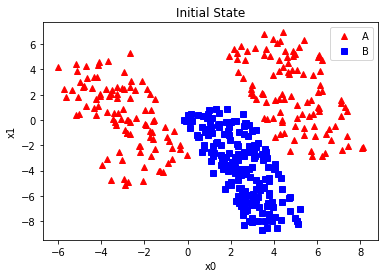

In [27]:
title = 'Initial State'
plot_2D(xy_label_A, xy_label_B, title)

In [28]:
nb_ds = input_ds 
nb_ds['labels']= map_idx2class

#xy points for label A
xy_label_A_nb = input_ds.where(nb_ds['labels']=='A').dropna().drop('labels', axis=1)
#xy points for label B
xy_label_B_nb = input_ds.where(nb_ds['labels']=='B').dropna().drop('labels', axis=1)

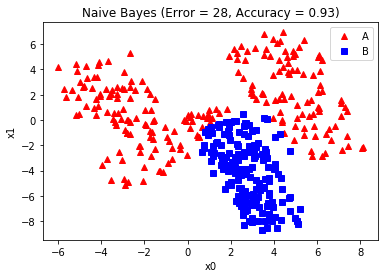

In [29]:
title = 'Naive Bayes (Error = {}, Accuracy = {})'.format(missclassified, accuracy)
plot_2D(xy_label_A_nb, xy_label_B_nb, title)